In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from keras.preprocessing.image import ImageDataGenerator, load_img

In [0]:
FAST_RUN = False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [0]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_10 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_11 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 384)        

In [0]:
from keras import layers
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 conv2d_6
1 activation_10
2 max_pooling2d_4
3 conv2d_7
4 activation_11
5 max_pooling2d_5
6 conv2d_8
7 activation_12
8 conv2d_9
9 activation_13
10 conv2d_10
11 activation_14
12 max_pooling2d_6
13 flatten_2
14 dense_5
15 activation_15
16 dropout_4
17 dense_6
18 activation_16
19 dropout_5
20 dense_7
21 activation_17
22 dropout_6
23 dense_8
24 activation_18


In [0]:
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(model.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d_6
1 activation_10
2 max_pooling2d_4
3 conv2d_7
4 activation_11
5 max_pooling2d_5
6 conv2d_8
7 activation_12
8 conv2d_9
9 activation_13
10 conv2d_10
11 activation_14
12 max_pooling2d_6
13 flatten_2
14 dense_5
15 activation_15
16 dropout_4
17 dense_6
18 activation_16
19 dropout_5


In [0]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
train_dir = '/content/drive/My Drive/samples/train'
validation_dir = '/content/drive/My Drive/samples/test'

In [0]:
import numpy as np
from random import shuffle

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
       rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 62
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)



Found 1114 images belonging to 7 classes.
Found 280 images belonging to 7 classes.


In [0]:
print (train_generator.class_indices)

{'101-151,0-30,50-90': 0, '101-151,62-92,132-172': 1, '101-151,93-123,173-213': 2, '152-202,31-61,132-172': 3, '203-253,31-61,50-90': 4, '50-100,0-30,173-213': 5, '50-100,31-61,91-131': 6}


In [26]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)



Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/17 [>.............................] - ETA: 20:25 - loss: 1.9431 - acc: 0.2097

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/17 [==>...........................] - ETA: 16:54 - loss: 1.9460 - acc: 0.1855

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/17 [====>.........................] - ETA: 15:52 - loss: 1.9456 - acc: 0.1613

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/17 [=====>........................] - ETA: 14:47 - loss: 1.9458 - acc: 0.1492

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/17 [=======>......................] - ETA: 13:49 - loss: 1.9457 - acc: 0.1484

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/17 [=========>....................] - ETA: 12:29 - loss: 1.9455 - acc: 0.1459

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/17 [==========>...................] - ETA: 11:25 - loss: 1.9455 - acc: 0.1389

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/17 [============>.................] - ETA: 10:20 - loss: 1.9453 - acc: 0.1417

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/17 [==============>...............] - ETA: 9:17 - loss: 1.9456 - acc: 0.1385 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/17 [===============>..............] - ETA: 8:17 - loss: 1.9453 - acc: 0.1359

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/17 [=================>............] - ETA: 7:14 - loss: 1.9451 - acc: 0.1382

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/17 [===================>..........] - ETA: 6:11 - loss: 1.9445 - acc: 0.1388

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/17 [====================>.........] - ETA: 5:09 - loss: 1.9447 - acc: 0.1331

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/17 [======================>.......] - ETA: 4:04 - loss: 1.9444 - acc: 0.1339

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/17 [========================>.....] - ETA: 3:02 - loss: 1.9443 - acc: 0.1325

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/17 [=========================>....] - ETA: 2:01 - loss: 1.9440 - acc: 0.1303

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/17 [===========================>..] - ETA: 59s - loss: 1.9441 - acc: 0.1312 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/17 [==============================] - 1296s 72s/step - loss: 1.9441 - acc: 0.1320 - val_loss: 1.9509 - val_acc: 0.1429
Epoch 2/40
18/17 [==============================] - 142s 8s/step - loss: 1.9392 - acc: 0.1526 - val_loss: 1.9661 - val_acc: 0.1429
Epoch 3/40
18/17 [==============================] - 233s 13s/step - loss: 1.9373 - acc: 0.1391 - val_loss: 1.9684 - val_acc: 0.1429
Epoch 4/40
18/17 [==============================] - 234s 13s/step - loss: 1.9349 - acc: 0.1284 - val_loss: 1.9035 - val_acc: 0.1429
Epoch 5/40
18/17 [==============================] - 238s 13s/step - loss: 1.9330 - acc: 0.1400 - val_loss: 1.9682 - val_acc: 0.1429
Epoch 6/40
18/17 [==============================] - 242s 13s/step - loss: 1.9309 - acc: 0.1346 - val_loss: 1.9705 - val_acc: 0.1429
Epoch 7/40
18/17 [==============================] - 235s 13s/step - loss: 1.9285 - acc: 0.1382 - val_loss: 1.9434 - val_acc: 0.1536
Epoch 8/40
18/17 [==============================] - 234s 13s/step - loss: 1.9279 - acc:

In [27]:
#Save model to json
import os
model.save_weights("npkalexa.h5")
print("model saved to disk....")

model saved to disk....


In [0]:
##Prediction Part
import numpy as np
from keras.preprocessing import image

In [0]:
img_pred = image.load_img('/content/drive/My Drive/samples/train/101-151,93-123,173-213/1(1002).jpg', target_size = (224, 224))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

In [0]:
model.load_weights('npkalexa.h5')

In [0]:
class_names = {0: '50-100,0-30,173-213', 1: '50-100,31-61,91-131' , 2:'101-151,0-30,50-90' , 3:'101-151,62-92,132-172' , 4:'101-151,93-123,173-213' , 5:'152-202,31-61,132-172' , 6:'203-253,31-61,50-90'}

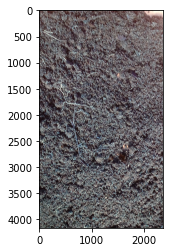

In [48]:
for img in os.listdir("/content/drive/My Drive/samples/train"):
    import cv2
    img3 = cv2.imread('/content/drive/My Drive/samples/train/101-151,93-123,173-213/1(1002).jpg')  
    plt.imshow(img3)

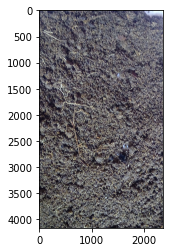

In [49]:
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

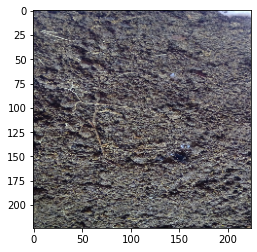

In [50]:
img3 = cv2.resize(img3,(224,224))
plt.imshow(img3)

In [0]:
img4 = np.reshape(img3,[1,224,224,3])

In [52]:
out = model.predict(img4) 
print (np.argmax(out))
print(class_names[np.argmax(out)])

4
101-151,93-123,173-213
